# Heart Disease Dataset

The study of heart health stands as a primary focus among researchers across various fields. Heart health ranks as a foremost concern because people have neglected their lifestyle behaviors while their way of life changes dramatically.

Research on heart disease has been ongoing for several decades even though modern lifestyle trends have worsened the disease risks. The scientists behind the original dataset included Robert Detrano together with Andras Jánosi and William Steinbrunn and Matthias Pfisterer along with additional contributors during their work in 1988. The dataset became part of the UCI Machine Learning Repository on June 30, 1988.

### **Dataset Source**

The dataset was compiled from four medical institutions:

- **Cleveland Clinic Foundation (USA)**
- **Hungarian Institute of Cardiology (Budapest, Hungary)**
- **University Hospital (Zurich, Switzerland)**
- **VA Medical Center (Long Beach, USA)**

For this task, I am using a **Kaggle dataset**, which is sourced from the original UCI dataset:  
[Link to dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

### **Alignment with UNSDG 3: Good Health and Well-being**

The chosen dataset aligns with **UN Sustainable Development Goal 3 (SDG 3: Good Health and Well-being)**, which aims to **ensure healthy lives and promote well-being for all**.

# **Using the Dataset for Classification Task**

### **Target Variable: `target` (Heart Disease Presence)**

In this classification task, the goal is to **predict the presence of heart disease** based on patient attributes. The dataset contains a binary target variable:

- `0` → No heart disease
- `1` → Heart disease present



# Exploratory Data Analysis and Data Understanding: Task 1

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.shape

(1025, 14)

The shape of the dataframe is `df.shape → (1025, 14)`.

- **Rows:** 1025
- **Columns:** 14


In [4]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


**The dataset consists of the following columns:**

- `age`
- `sex`
- `cp`
- `trestbps`
- `chol`
- `fbs`
- `restecg`
- `thalach`
- `exang`
- `oldpeak`
- `slope`
- `ca`
- `thal`
- `target`

#### Observations

- The dataset is purely numerical.
- There are no string-based categorical features.
- Possible data types: **integers (`int`), floating-point (`float`), or possibly encoded categorical data**.


In [5]:
# confirming data types of each attributes
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

- **Encoded Categorical Variables** ⇒ `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, `target`
- **Non-Encoded Numerical Variables** ⇒ `age`, `trestbps`, `chol`, `thalach`, `oldpeak`


In [7]:
print("\nSome statistical information of Non-encoded Numerical Variables:\n")

data[["age", "trestbps", "chol", "thalach", "oldpeak"]].describe()


Some statistical information of Non-encoded Numerical Variables:



,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


#### **Age**

- **Mean (54.43) & Median (56)** → Slightly left-skewed distribution.
- **Range: 29 - 77** → Covers a broad adult age group.
- **IQR (48 - 61)** → Most people in the dataset are between **48 to 61 years old**.
- No extreme outliers observed.

#### **Resting Blood Pressure (trestbps)**

- **Mean (131.61) & Median (130)** → Fairly symmetric distribution.
- **Range: 94 - 200** → Minimum is reasonable, but **200 seems high**.
- **IQR (120 - 140)** → Most values are within a normal range.
- Possible **outliers** above **200**.

#### **Cholesterol (chol)**

- **Mean (246.0) & Median (240)** → Normal distribution.
- **Range: 94 - 564** →
  - **Minimum 94** is low for cholesterol.
  - **Max 564 is quite high**, potential outlier.
- **IQR (211 - 275)** → Most people have cholesterol between these values.

#### **Maximum Heart Rate (thalach)**

- **Mean (149.11) & Median (152)** → Slightly left-skewed.
- **Range: 71 - 202** →
  - **Minimum 71 is quite low**, indicating individuals with very low max heart rate.
  - **Max 202 is reasonable.**
- **IQR (132 - 166)** → Most values fall in this range.
- No extreme outliers.

#### **Oldpeak (ST Depression Induced by Exercise)**

- **Mean (1.07) & Median (0.8)** → Right-skewed (since mean > median).
- **Range: 0.0 - 6.2** →
  - Many **zero values**, indicating no ST depression in some cases.
  - **6.2 is quite high**, suggesting outliers.
- **IQR (0.0 - 1.8)** → Most values are **below 1.8**.

### **Overall Observations**

**No missing values** in any column.  
**Most attributes are normally distributed** except **Oldpeak**, which is slightly skewed.  
**Possible outliers** in **cholesterol, thalach, and oldpeak**.


In [8]:
# confirming the presence of missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Hence, there are no missing values in any of the attributes.**


In [9]:
print("\nSome statistical information of Encoded Categorical Variables:\n")

data[["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]].describe()


Some statistical information of Encoded Categorical Variables:



,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.695610,0.942439,0.149268,0.529756,0.336585,1.385366,0.754146,2.323902,0.513171
std,0.460373,1.029641,0.356527,0.527878,0.472772,0.617755,1.030798,0.620660,0.500070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [10]:
data[data.duplicated()].value_counts().sum()

np.int64(723)

In [11]:
data.shape[0] - data.duplicated().sum()

np.int64(302)

- **Total Rows:** 1025
- **Duplicate Rows:** 723
- **Unique Rows:** 302

The database contains **723 rows** which duplicate each other because all their attributes maintain identical values. A high number of duplicate entries exists in the data which signifies significant redundancy.

It is essential to maintain unique records by selecting the initial occurrence from duplicate entries. Thus, the final rows of data amount to 302 after keeping the initial occurence of duplicated rows.


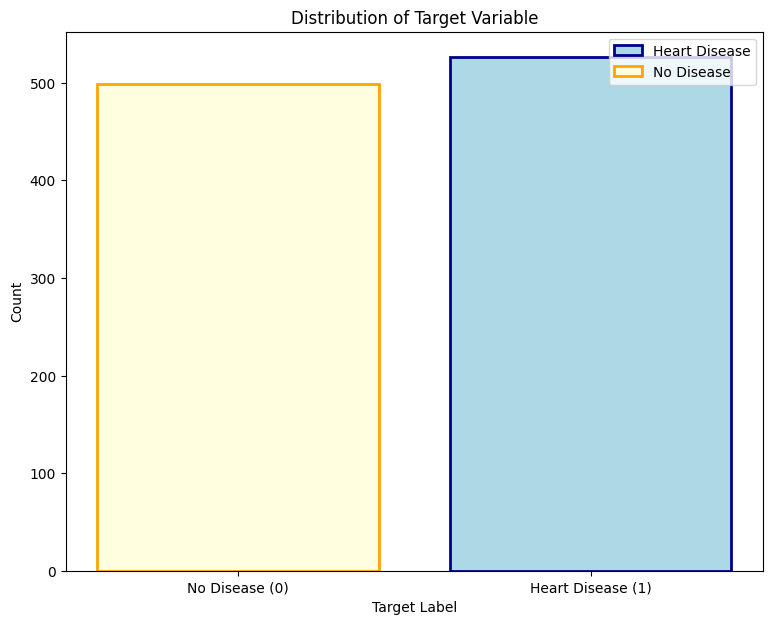

Total records: 1025
No Disease (0): 499 (48.68%)
Heart Disease (1): 526 (51.32%)

Observation: More people have heart disease.



In [12]:
fig = plt.figure(figsize=(9, 7))

target_counts = data["target"].value_counts()
total = target_counts.sum()
percentages = (target_counts / total) * 100

colors = ["lightblue", "lightyellow"]
edgecolors = ["darkblue", "orange"]

plt.bar(
    target_counts.index,
    target_counts.values,
    color=colors,
    edgecolor=edgecolors,
    linewidth=2,
    label=["Heart Disease", "No Disease"],
)

plt.xticks([0, 1], ["No Disease (0)", "Heart Disease (1)"])

plt.xlabel("Target Label")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")

plt.legend()

plt.show()

print(
    f"Total records: {total}\n"
    f"No Disease (0): {target_counts[0]} ({percentages[0]:.2f}%)\n"
    f"Heart Disease (1): {target_counts[1]} ({percentages[1]:.2f}%)"
)

obs = (
    "More people have heart disease."
    if percentages[1] > percentages[0]
    else (
        "More people do not have heart disease."
        if percentages[0] > percentages[1]
        else "The dataset is perfectly balanced."
    )
)

print(f"\nObservation: {obs}\n")

**A comparatively small disparity (2.64 %) between target variable distributions makes balancing unnecessary for this case.**


In [13]:
class_col = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
for column in class_col:
    print(f"{column} imbalance:")
    print(data[column].value_counts(normalize=True) * 100)

sex imbalance:
sex
1    69.560976
0    30.439024
Name: proportion, dtype: float64
cp imbalance:
cp
0    48.487805
2    27.707317
1    16.292683
3     7.512195
Name: proportion, dtype: float64
fbs imbalance:
fbs
0    85.073171
1    14.926829
Name: proportion, dtype: float64
restecg imbalance:
restecg
1    50.048780
0    48.487805
2     1.463415
Name: proportion, dtype: float64
exang imbalance:
exang
0    66.341463
1    33.658537
Name: proportion, dtype: float64
slope imbalance:
slope
1    47.024390
2    45.756098
0     7.219512
Name: proportion, dtype: float64
ca imbalance:
ca
0    56.390244
1    22.048780
2    13.073171
3     6.731707
4     1.756098
Name: proportion, dtype: float64
thal imbalance:
thal
2    53.073171
3    40.000000
1     6.243902
0     0.682927
Name: proportion, dtype: float64
target imbalance:
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


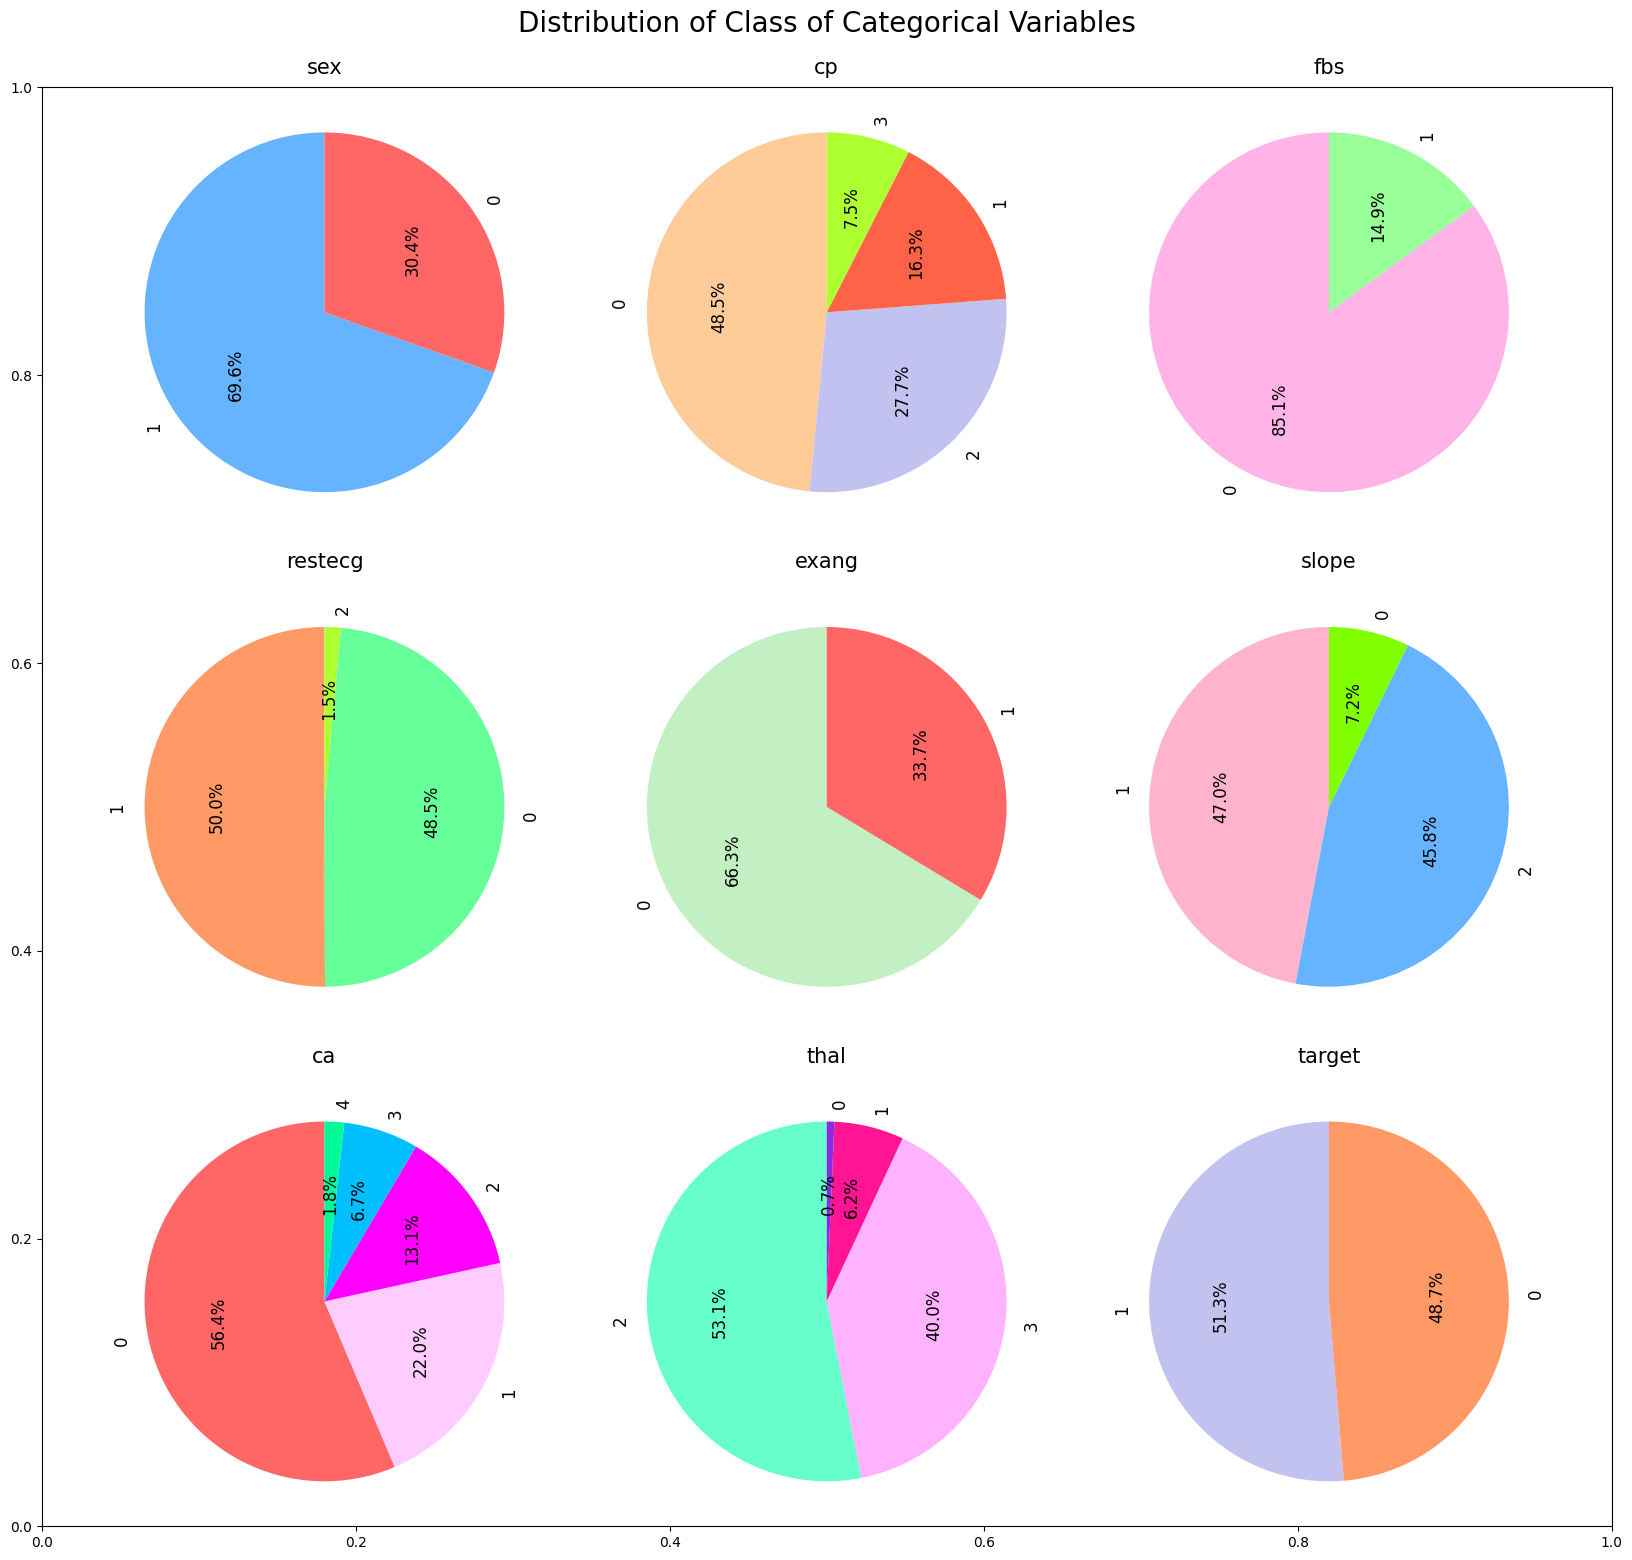

In [61]:
plt.figure(figsize=(16, 16))
color_palettes = [
    ["#66b3ff", "#ff6666"],  
    ["#ffcc99", "#c2c2f0", "#FF6347", "#ADFF2F"], 
    ["#ffb3e6", "#99ff99"], 
    ["#ff9966", "#66ff99", "#ADFF2F"],  
    ["#c2f0c2", "#ff6666"],  
    ["#ffb3cc", "#66b3ff", "#7FFF00"],  
    ["#ff6666", "#ffccff", "#FF00FF", "#00BFFF", "#00FA9A"],  
    ["#66ffcc", "#ffb3ff", "#FF1493", "#8A2BE2"],  
    ["#c2c2f0", "#ff9966"],  
]
plt.title("Distribution of Class of Categorical Variables", fontsize=20, pad=40)
for i in range(len(class_col)):
    plt.subplot(3, 3, i + 1)
    ax = data[class_col[i]].value_counts().plot.pie(
        autopct="%1.1f%%", colors=color_palettes[i], startangle=90
    )
    for text in ax.texts:
        text.set_rotation(90)
        text.set_fontsize(12)
        
    plt.title(f"{class_col[i]}", fontsize=15, pad=10)
    plt.ylabel("")
    plt.tight_layout()

plt.show()

- **sex**: ~69.56% male (1), ~30.44% female (0).
- **cp**: Class `0` (48.49%) is the majority, followed by class `2` (27.71%).
- **fbs**: ~85.07% have fasting blood sugar (fbs) of 0.
- **restecg**: Majority in classes `0` and `1`, with a small portion in class `2`.
- **exang**: ~66.34% no angina (0), ~33.66% have angina (1).
- **slope**: Class `1` (47.02%) and class `2` (45.76%) dominate.
- **ca**: Majority in class `0` (56.39%).
- **thal**: Class `2` (53.07%) is the most frequent, followed by class `3` (40%).
- **target**: ~51.32% have heart disease (1), ~48.68% do not (0).

Performance results of a model can be affected by feature imbalance but this dependency varies between different model selections as well as trial results during training.

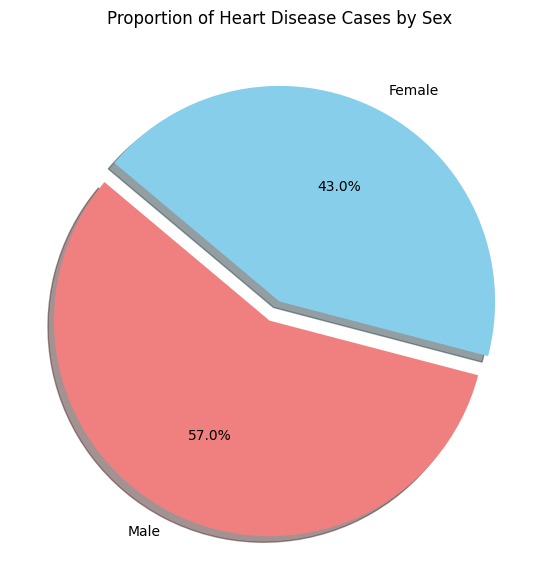

In [15]:
sex_counts = pd.Series({1: 713, 0: 312})
target_counts = pd.Series({1: 526, 0: 499})

sex_target_counts = data.groupby("sex")["target"].value_counts().unstack()

sex_heart_disease_proportion = sex_target_counts[1] / sex_counts
male_heart_disease = sex_target_counts.loc[1, 1]
female_heart_disease = sex_target_counts.loc[0, 1]

total_heart_disease = male_heart_disease + female_heart_disease

male_proportion = male_heart_disease / total_heart_disease
female_proportion = female_heart_disease / total_heart_disease

labels = ['Male', 'Female']
sizes = [male_proportion, female_proportion]
colors = ['lightcoral', 'skyblue']
explode = (0.1, 0) 

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Proportion of Heart Disease Cases by Sex')
plt.show()

`Males` are 14% more likely than females to get heart disease.

C:\Users\USER\AppData\Local\Temp\ipykernel_12600\3436025319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["target"], y=data["age"], palette=["orange", "green"])


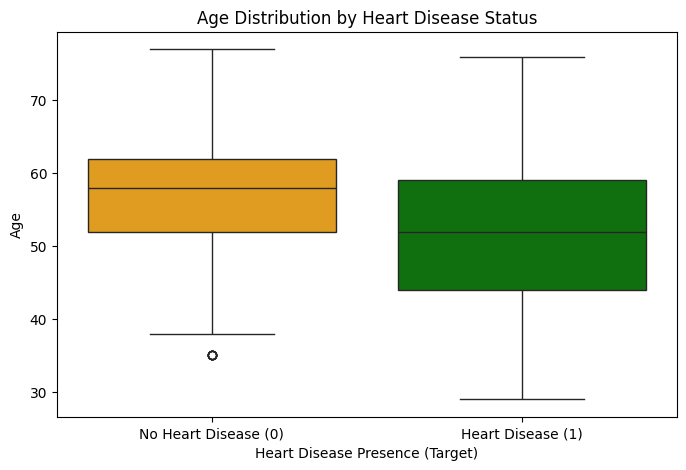

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["target"], y=data["age"], palette=["orange", "green"])
plt.xticks([0, 1], ['No Heart Disease (0)', 'Heart Disease (1)'])
plt.xlabel("Heart Disease Presence (Target)")
plt.ylabel("Age")
plt.title("Age Distribution by Heart Disease Status")
plt.show()

In [17]:
print(data.corr()["target"].drop("target"))

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
Name: target, dtype: float64


In [18]:
print("Features highly correlated with target:")
print(data.corr()["target"].drop("target")[abs(data.corr()["target"].drop("target")) > 0.8])

Features highly correlated with target:
Series([], Name: target, dtype: float64)


`target` is not highly collinear with other predictors. 

# Data Cleaning and Preprocessing: Task 1

In [19]:
df = data.drop_duplicates(keep="first", inplace=False)

In [20]:
df.shape

(302, 14)

In [21]:
from utils import analyze_column
analyze_column(df, ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])


        TARGET VARIABLE: AGE
        Lower Bound for Outliers: 28.50
        Upper Bound for Outliers: 80.50
        Skewness Analysis: Symmetric → Mean ≈ Median ≈ Mode

        Outlier Detection
           - Total Outliers: 0
           - Outliers Above Upper Bound: None
           - Outliers Below Lower Bound: None
        

        TARGET VARIABLE: TRESTBPS
        Lower Bound for Outliers: 90.00
        Upper Bound for Outliers: 170.00
        Skewness Analysis: Right-skewed (Positive) → Mode < Median < Mean

        Outlier Detection
           - Total Outliers: 9
           - Outliers Above Upper Bound: [180, 178, 174, 180, 192, 200, 172, 180, 178]
           - Outliers Below Lower Bound: None
        

        TARGET VARIABLE: CHOL
        Lower Bound for Outliers: 115.38
        Upper Bound for Outliers: 370.38
        Skewness Analysis: Right-skewed (Positive) → Mode < Median < Mean

        Outlier Detection
           - Total Outliers: 5
           - Outliers Above Upper Bo

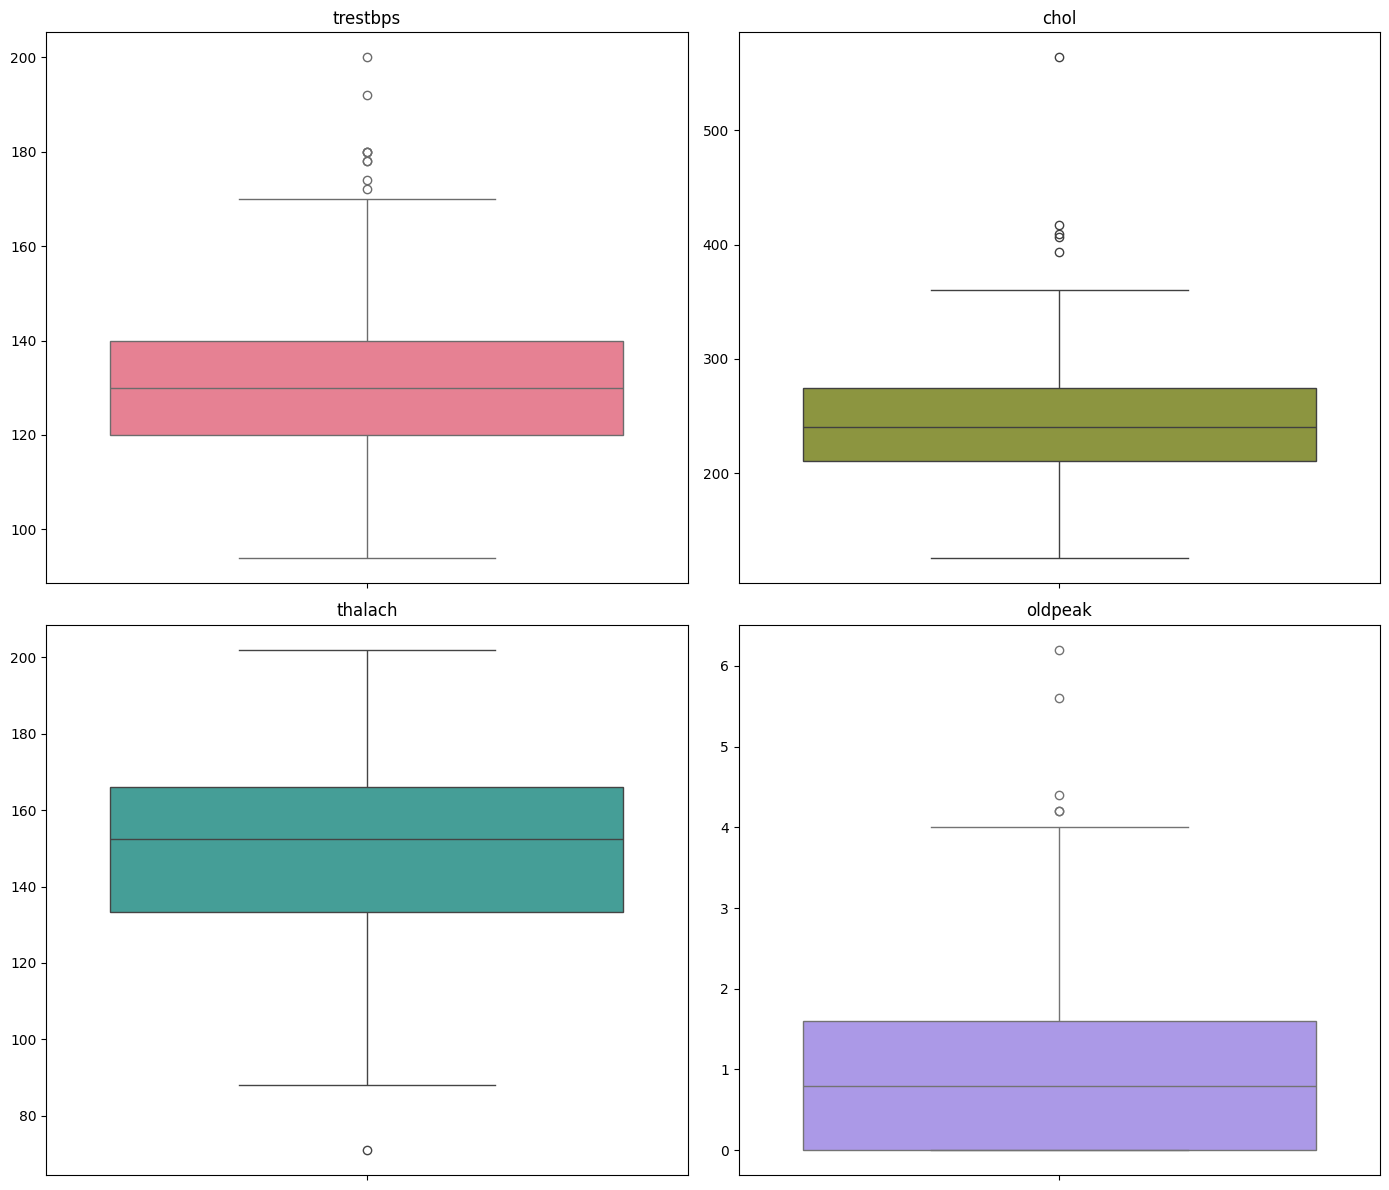

In [22]:
cols = ["trestbps", "chol", "thalach", "oldpeak"]

colors = sns.color_palette("husl", len(cols))  

plt.figure(figsize=(14, 12))

for i in range(len(cols)):  
    plt.subplot(2, 2, i + 1)  
    sns.boxplot(y=df[cols[i]], color=colors[i])
    plt.title(cols[i])
    plt.ylabel("")  
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12600\516269472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[cat_cols[i]], palette="husl")
C:\Users\USER\AppData\Local\Temp\ipykernel_12600\516269472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[cat_cols[i]], palette="husl")
C:\Users\USER\AppData\Local\Temp\ipykernel_12600\516269472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[cat_cols[i]], palette="husl")


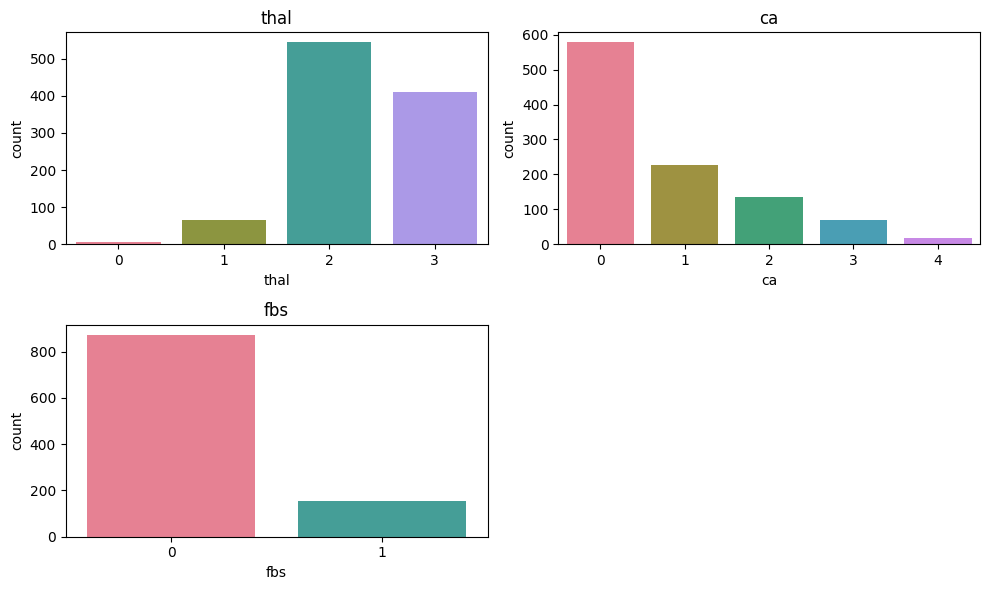

In [23]:
cat_cols = ["thal", "ca", "fbs"]  

plt.figure(figsize=(10, 6))
for i in range(len(cat_cols)):
    plt.subplot(2, 2, i + 1) 
    sns.countplot(x=data[cat_cols[i]], palette="husl")
    plt.title(cat_cols[i])

plt.tight_layout()
plt.show()

#### 4 as an unexpected value in ca

In [24]:
df["ca"].value_counts()

ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64

The **number of main vessels (0–3) colored by fluoroscopy** is represented by the 'ca' feature. However, **4** remains as an unexpected value here.

The value `4` does not seem to align with standard medical definitions as found online.   
The fact that `4` only shows up four times in our newly cleaned dataframe after counting the occurrences suggests that there may have been an input error or misclassification

Since 'ca' is **ordinal** (ordered categories), we can avoid distorting the dataset by substituting `4` with the **most common valid value (mode)**, which is 0. Replacing the rows preserves more information because dropping them could reduce the amount of the data.

In [25]:
df.loc[:, "ca"] = df["ca"].replace(4, df["ca"].mode()[0])

In [26]:
df["ca"].value_counts()

ca
0    179
1     65
2     38
3     20
Name: count, dtype: int64

The **number of main vessels (0–3) colored by fluoroscopy** is represented by the 'ca' feature. However, **4** remains as an unexpected value here.

The value `4` does not seem to align with standard medical definitions as found online.  
The fact that `4` only shows up four times in our newly cleaned dataframe after counting the occurrences suggests that there may have been an input error or misclassification

Since 'ca' is **ordinal** (ordered categories), we can avoid distorting the dataset by substituting `4` with the **most common valid value (mode)**, which is 0. Replacing the rows preserves more information because dropping them could reduce the amount of the data.

In [27]:
df.loc[:, "ca"] = df["ca"].replace(4, df["ca"].mode()[0])

In [28]:
class_col = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
for column in class_col:
    print(f"{column} imbalance:")
    print(data[column].value_counts(normalize=True) * 100)

sex imbalance:
sex
1    69.560976
0    30.439024
Name: proportion, dtype: float64
cp imbalance:
cp
0    48.487805
2    27.707317
1    16.292683
3     7.512195
Name: proportion, dtype: float64
fbs imbalance:
fbs
0    85.073171
1    14.926829
Name: proportion, dtype: float64
restecg imbalance:
restecg
1    50.048780
0    48.487805
2     1.463415
Name: proportion, dtype: float64
exang imbalance:
exang
0    66.341463
1    33.658537
Name: proportion, dtype: float64
slope imbalance:
slope
1    47.024390
2    45.756098
0     7.219512
Name: proportion, dtype: float64
ca imbalance:
ca
0    56.390244
1    22.048780
2    13.073171
3     6.731707
4     1.756098
Name: proportion, dtype: float64
thal imbalance:
thal
2    53.073171
3    40.000000
1     6.243902
0     0.682927
Name: proportion, dtype: float64
target imbalance:
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


#### handling outliers in trestbps

In [29]:
df['trestbps'].value_counts()[[180, 178, 174, 192, 200, 172]]

trestbps
180    3
178    2
174    1
192    1
200    1
172    1
Name: count, dtype: int64

In [30]:
extreme_trestbps = df[df['trestbps'] > 180]
extreme_trestbps_summary = extreme_trestbps[['age', 'chol', 'thalach', 'target', 'sex']].describe()

extreme_trestbps_age = extreme_trestbps['age'].value_counts()
extreme_trestbps_chol = extreme_trestbps['chol'].value_counts()
extreme_trestbps_thalach = extreme_trestbps['thalach'].value_counts()

print(extreme_trestbps_summary)
print(extreme_trestbps_age)
print(extreme_trestbps_chol)
print(extreme_trestbps_thalach)


             age        chol    thalach  target       sex
count   2.000000    2.000000    2.00000     2.0  2.000000
mean   55.000000  285.500000  164.00000     0.0  0.500000
std     1.414214    3.535534   43.84062     0.0  0.707107
min    54.000000  283.000000  133.00000     0.0  0.000000
25%    54.500000  284.250000  148.50000     0.0  0.250000
50%    55.000000  285.500000  164.00000     0.0  0.500000
75%    55.500000  286.750000  179.50000     0.0  0.750000
max    56.000000  288.000000  195.00000     0.0  1.000000
age
54    1
56    1
Name: count, dtype: int64
chol
283    1
288    1
Name: count, dtype: int64
thalach
195    1
133    1
Name: count, dtype: int64


In [31]:
df.loc[df['trestbps'] > 170, 'trestbps'] = 170
df.loc[df['chol'] > 370, 'chol'] = 370
df.loc[df['oldpeak'] > 4, 'oldpeak'] = 4

In [32]:
analyze_column(df, ['trestbps', 'chol', 'oldpeak'])


        TARGET VARIABLE: TRESTBPS
        Lower Bound for Outliers: 90.00
        Upper Bound for Outliers: 170.00
        Skewness Analysis: Symmetric → Mean ≈ Median ≈ Mode

        Outlier Detection
           - Total Outliers: 0
           - Outliers Above Upper Bound: None
           - Outliers Below Lower Bound: None
        

        TARGET VARIABLE: CHOL
        Lower Bound for Outliers: 115.38
        Upper Bound for Outliers: 370.38
        Skewness Analysis: Symmetric → Mean ≈ Median ≈ Mode

        Outlier Detection
           - Total Outliers: 0
           - Outliers Above Upper Bound: None
           - Outliers Below Lower Bound: None
        

        TARGET VARIABLE: OLDPEAK
        Lower Bound for Outliers: -2.40
        Upper Bound for Outliers: 4.00
        Skewness Analysis: Right-skewed (Positive) → Mode < Median < Mean

        Outlier Detection
           - Total Outliers: 0
           - Outliers Above Upper Bound: None
           - Outliers Below Lower Bound: N

Outliers were present but in small numbers, so removing them entirely would cause unnecessary data loss. Instead, in order to avoid skewed results, I only capped extreme values. 
While some high values are acceptable, extreme situations (such as trestbps >= 200) are uncommon. There were not many outliers, so their impact on the dataset seems minimal. 

# Data Preprocessing: Task 1

In [33]:
df1 = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], 
                    prefix=['Chest_Pain', 'Electrocardiographic', 'Thal_type'])

df1 = df1.astype(int)
df1

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,Chest_Pain_1,Chest_Pain_2,Chest_Pain_3,Electrocardiographic_0,Electrocardiographic_1,Electrocardiographic_2,Thal_type_0,Thal_type_1,Thal_type_2,Thal_type_3
0,52,1,125,212,0,168,0,1,2,2,...,0,0,0,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3,0,0,...,0,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2,0,0,...,0,0,0,0,1,0,0,0,0,1
3,61,1,148,203,0,161,0,0,2,1,...,0,0,0,0,1,0,0,0,0,1
4,62,0,138,294,1,106,0,1,1,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,115,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
733,44,0,108,141,0,175,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
739,52,1,128,255,0,161,1,0,2,1,...,0,0,0,0,1,0,0,0,0,1
843,59,1,160,273,0,125,0,0,2,0,...,0,0,1,1,0,0,0,0,1,0


In [34]:
columns_to_check = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']

for col in columns_to_check:
    print(f"Class imbalance for '{col}':")
    print(df1[col].value_counts(normalize=True) * 100)
    print("\n" + "-"*40 + "\n")

Class imbalance for 'sex':
sex
1    68.211921
0    31.788079
Name: proportion, dtype: float64

----------------------------------------

Class imbalance for 'fbs':
fbs
0    85.099338
1    14.900662
Name: proportion, dtype: float64

----------------------------------------

Class imbalance for 'exang':
exang
0    67.218543
1    32.781457
Name: proportion, dtype: float64

----------------------------------------

Class imbalance for 'slope':
slope
2    46.688742
1    46.357616
0     6.953642
Name: proportion, dtype: float64

----------------------------------------

Class imbalance for 'ca':
ca
0    59.271523
1    21.523179
2    12.582781
3     6.622517
Name: proportion, dtype: float64

----------------------------------------

Class imbalance for 'target':
target
1    54.304636
0    45.695364
Name: proportion, dtype: float64

----------------------------------------



In [35]:
from sklearn.model_selection import train_test_split

x = df1.drop(columns=['target'])  
y = df1['target'] 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 211 samples
Test set: 91 samples


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression using Sigmoid Function

In [37]:
def initialize_weights(n_features):
    weights = np.zeros((n_features, 1))  # Weight vector (n_features x 1)
    bias = 0  # Bias term
    return weights, bias

n_features = X_train.shape[1]
weights, bias = initialize_weights(n_features)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def predict(x, weights, bias):
    linear_model = np.dot(x, weights) + bias
    return sigmoid(linear_model)


def compute_loss(y_true, y_pred):
    m = len(y_true)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

def compute_gradients(X, y, y_pred):
    m = len(y)
    dw = np.dot(X.T, (y_pred - y)) / m  # Gradient of weights
    db = np.mean(y_pred - y)  # Gradient of bias
    return dw, db



In [62]:
def train(x, y, learning_rate=0.01, iter=1200):
    n_features = x.shape[1]
    weights, bias = initialize_weights(n_features)
    loss_history = []
    
    y = y.values.reshape(-1, 1) 
    
    for i in range(iter):
        y_pred = predict(x, weights, bias)  
        loss = compute_loss(y, y_pred)  
        loss_history.append(loss)
        
        dw, db = compute_gradients(x, y, y_pred)  
        
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")
    
    return weights, bias, loss_history

weights, bias, loss_history = train(X_train_scaled, y_train, learning_rate=0.01, iter=1200)


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4458
Epoch 200, Loss: 0.3841
Epoch 300, Loss: 0.3578
Epoch 400, Loss: 0.3432
Epoch 500, Loss: 0.3337
Epoch 600, Loss: 0.3271
Epoch 700, Loss: 0.3222
Epoch 800, Loss: 0.3184
Epoch 900, Loss: 0.3153
Epoch 1000, Loss: 0.3128
Epoch 1100, Loss: 0.3108


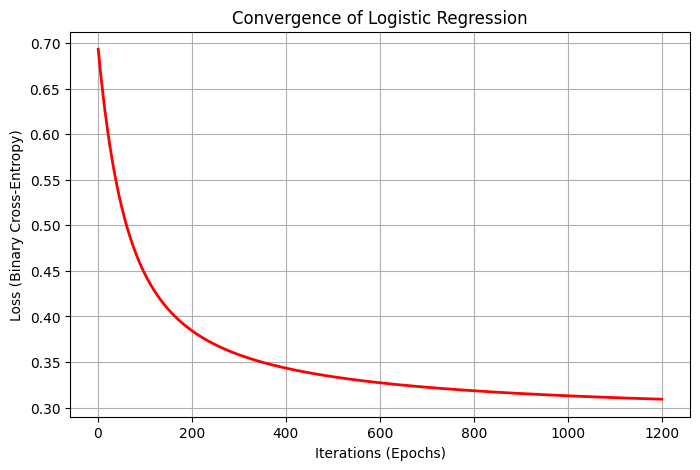

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_history) + 1), loss_history, color="red", linewidth=2)
plt.xlabel("Iterations (Epochs)")
plt.ylabel("Loss (Binary Cross-Entropy)")
plt.title("Convergence of Logistic Regression")
plt.grid(True)
plt.show()

In [40]:
def classify(x, weights, bias, threshold=0.5):
    y_pred = predict(x, weights, bias)
    return (y_pred >= threshold).astype(int)

In [41]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

y_train_pred = classify(X_train_scaled, weights, bias).flatten()
y_test_pred = classify(X_test_scaled, weights, bias).flatten()

train_acc = accuracy(y_train, y_train_pred)
test_acc = accuracy(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")

Train Accuracy: 87.20%
Test Accuracy: 80.22%


In [42]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:\nTP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

Confusion Matrix:
TP: 38, TN: 35, FP: 13, FN: 5


In [43]:
def precision_recall_f1(TP, TN, FP, FN):
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return precision, recall, f1_score

precision, recall, f1 = precision_recall_f1(TP, TN, FP, FN)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.7451
Recall: 0.8837
F1-score: 0.8085


In [44]:
def log_loss_manual(y_true, y_pred_probs):
    epsilon = 1e-15 
    y_pred_probs = np.clip(y_pred_probs, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred_probs) + (1 - y_true) * np.log(1 - y_pred_probs))
    return loss

y_pred_probs = predict(X_test_scaled, weights, bias).flatten()
log_loss_value = log_loss_manual(y_test, y_pred_probs)
print(f"Log Loss: {log_loss_value:.4f}")

Log Loss: 0.4172


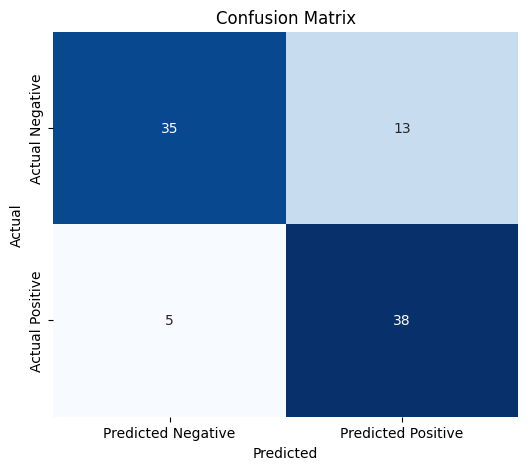

In [ ]:
TP = 38
TN = 35
FP = 13
FN = 5

conf_matrix = np.array([[TN, FP], [FN, TP]])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

plt.show()

# Primary Models

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [63]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Decision Tree Model Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}\n")

print("Classification Report:\n", classification_report(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Decision Tree Model Performance:
Training Accuracy: 0.9431
Test Accuracy: 0.8132

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81        48
           1       0.77      0.86      0.81        43

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91

Confusion Matrix:
 [[37 11]
 [ 6 37]]


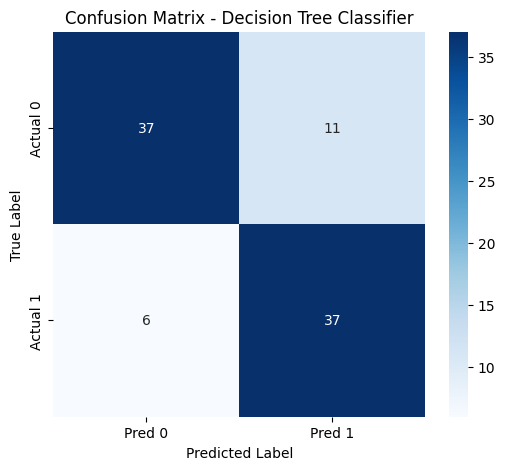

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

## Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [65]:
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Model Performance:")
print(f"Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Test Accuracy: {test_accuracy_rf:.4f}\n")

print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))

Random Forest Model Performance:
Training Accuracy: 1.0000
Test Accuracy: 0.8242

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        48
           1       0.76      0.91      0.83        43

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.84      0.82      0.82        91

Confusion Matrix:
 [[36 12]
 [ 4 39]]


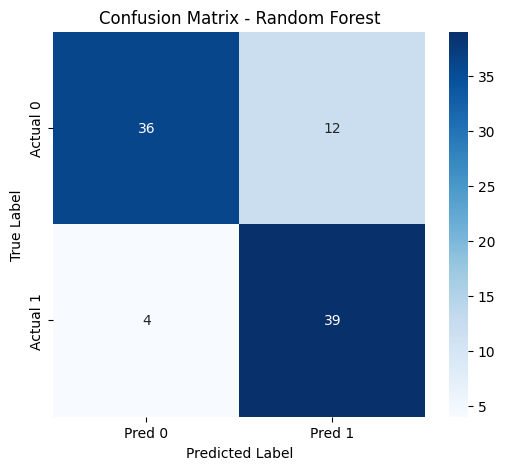

In [60]:
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Hyperparamter Optimization using Cross Validation

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, 15], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [67]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  # Number of trees
    'max_depth': np.arange(3, 20, 3),  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split a node
    'min_samples_leaf': [1, 2, 5, 10],  # Min samples per leaf
    'max_features': ['sqrt', 'log2'],  # Features to consider at each split
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'bootstrap': [True, False]  # Bootstrapping
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=20, cv=5,
    scoring='accuracy', n_jobs=-1, random_state=42
)

random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': np.int64(100), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': np.int64(12), 'criterion': 'gini', 'bootstrap': True}


# Feature Selection

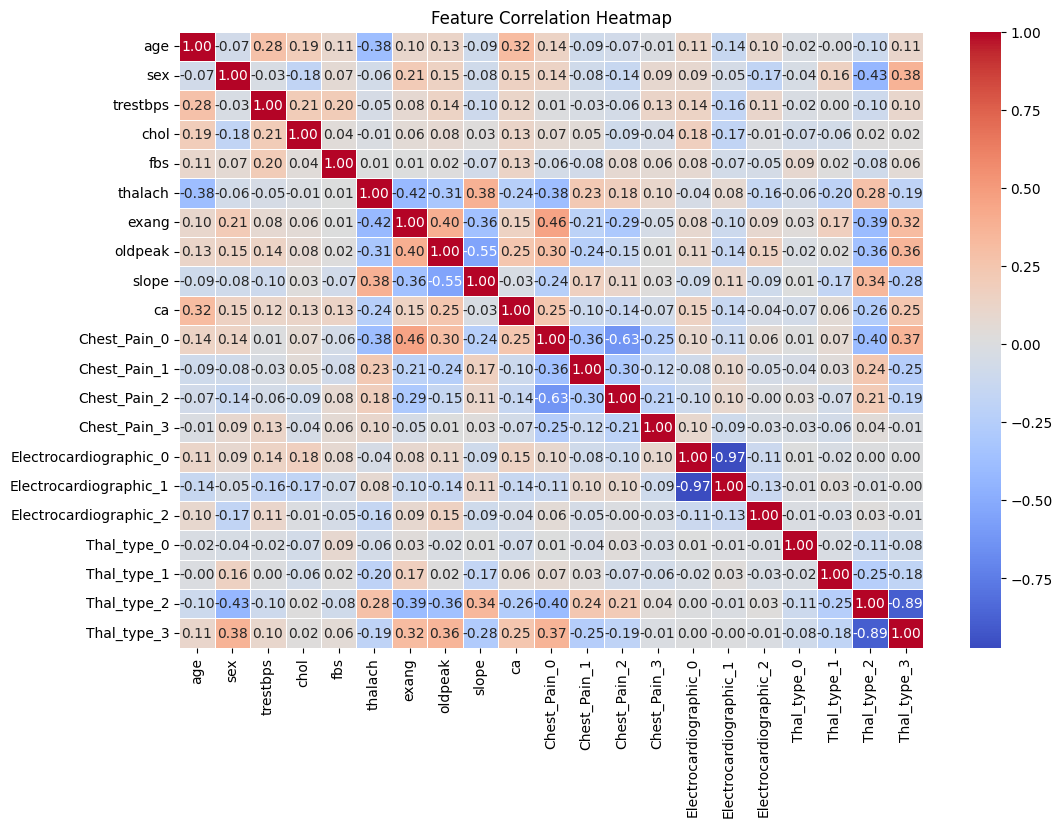

Highly Correlated Features to Remove: {'Thal_type_3', 'Electrocardiographic_1', 'Electrocardiographic_0', 'Thal_type_2'}


C:\Users\USER\AppData\Local\Temp\ipykernel_12600\765436711.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if corr_pairs[i] > threshold:


In [68]:
corr_matrix = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

threshold = 0.85
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_features = set()

for i in range(len(corr_pairs)):
    if corr_pairs.index[i][0] != corr_pairs.index[i][1]:  
        if corr_pairs[i] > threshold:
            high_corr_features.add(corr_pairs.index[i][1]) 

print("Highly Correlated Features to Remove:", high_corr_features)


In [52]:
X2_train = X_train.drop(columns=high_corr_features)
X2_test = X_test.drop(columns=high_corr_features)

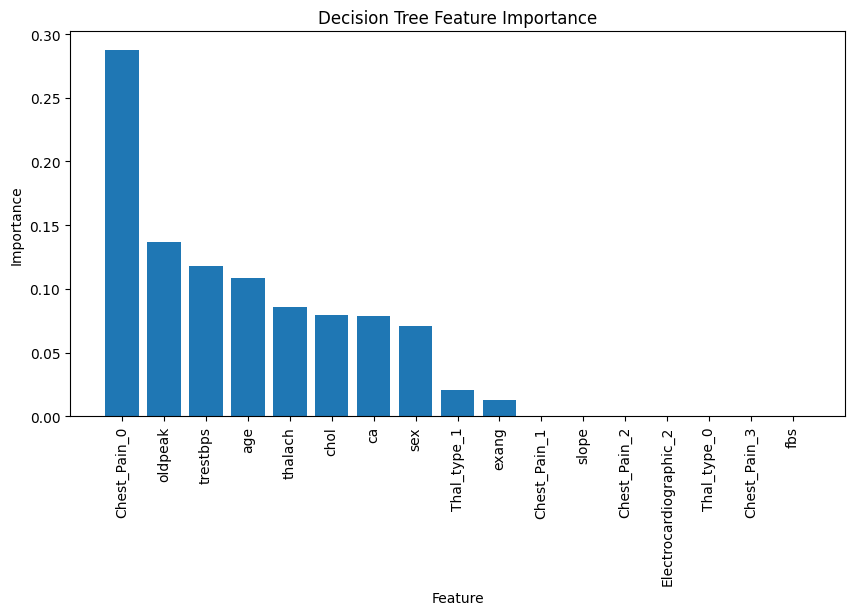

In [53]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X2_train, y_train)

feature_importances = dt.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(X2_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X2_train.shape[1]), X2_train.columns[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Decision Tree Feature Importance")
plt.show()


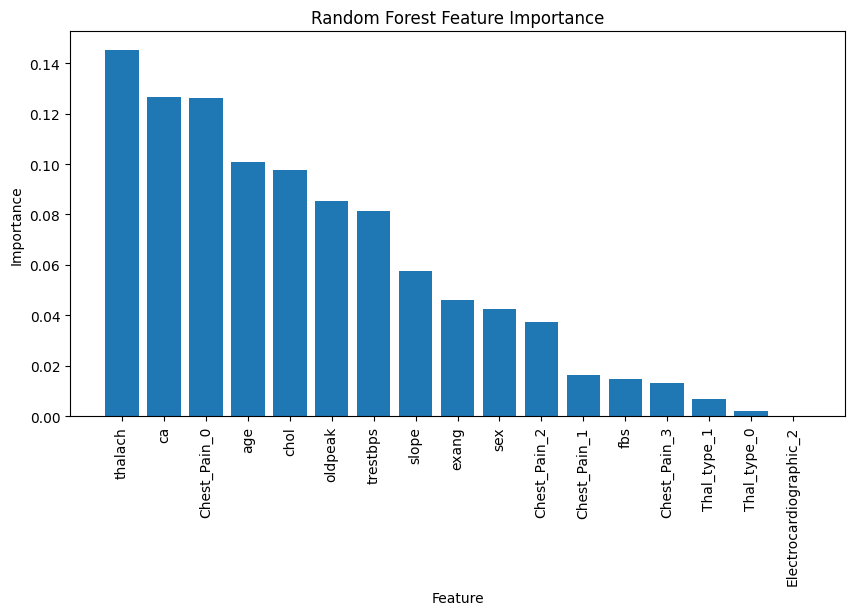

Top 10 Most Important Features (Random Forest):
1. thalach
2. ca
3. Chest_Pain_0
4. age
5. chol
6. oldpeak
7. trestbps
8. slope
9. exang
10. sex
11. Chest_Pain_2


In [69]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X2_train, y_train)

feature_importances_rf = rf.feature_importances_
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]  

plt.figure(figsize=(10, 5))
plt.bar(range(X2_train.shape[1]), feature_importances_rf[sorted_indices_rf])
plt.xticks(range(X2_train.shape[1]), X2_train.columns[sorted_indices_rf], rotation=90)
plt.xlabel("Feature")   
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()
top_n = 11
top_features_rf = X2_train.columns[sorted_indices_rf[:top_n]]

print("Top 10 Most Important Features (Random Forest):")
for i in range(min(top_n, len(top_features_rf))): 
    print(f"{i + 1}. {top_features_rf[i]}")


# Rebulding the Random Forest Classifier using best set of hyperparamter and features

Training Accuracy: 0.943127962085308
Test Accuracy: 0.8131868131868132

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        48
           1       0.77      0.86      0.81        43

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



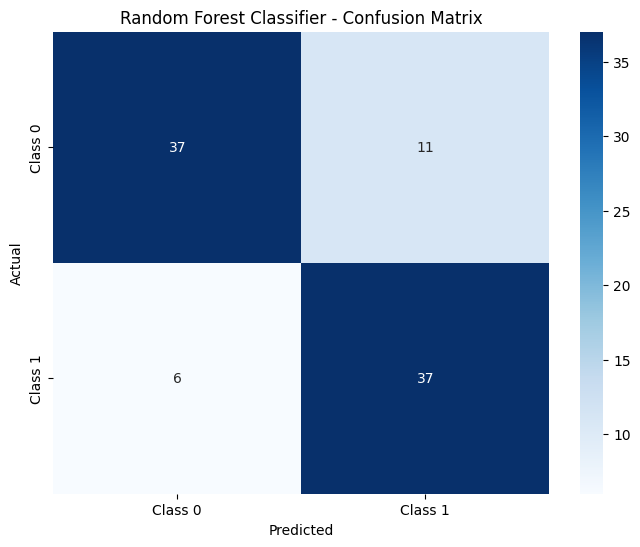

In [70]:
best_params_rf = {
    'n_estimators': 100, 
    'min_samples_split': 10, 
    'min_samples_leaf': 1, 
    'max_features': 'log2', 
    'max_depth': 12, 
    'criterion': 'gini', 
    'bootstrap': True,
}

rf_classifier = RandomForestClassifier(random_state=42, **best_params_rf)
rf_classifier.fit(X_train[top_features_rf], y_train)

y_train_pred = rf_classifier.predict(X_train[top_features_rf])
y_test_pred = rf_classifier.predict(X_test[top_features_rf])

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.show()

- **Before tuning:**  
  - **Training Accuracy:** **1.0000** (overfitting)  
  - **Test Accuracy:** **0.8242**  
  - **Precision & Recall:**  
    - **Class 0:** Precision **0.90**, Recall **0.75**  
    - **Class 1:** Precision **0.76**, Recall **0.91**  
  - **Confusion Matrix:** TP = **39**, TN = **36**, FP = **12**, FN = **4**  
  - **F1-score:** Strong across both classes  

- **After tuning and feature selection:**  
  - **Training Accuracy:** **0.9431** (better generalization, reduced overfitting)  
  - **Test Accuracy:** **0.8132** (slightly lower, but still strong)  
  - **Precision & Recall:**  
    - **Class 0:** Precision **0.86**, Recall **0.77**  
    - **Class 1:** Precision **0.77**, Recall **0.86**  
  - **Confusion Matrix:** TP = **39**, TN = **36**, FP = **12**, FN = **4**  
  - **F1-score:** **Balanced across both classes**  
